## ПРАКТИЧНА РОБОТА 8

### Варіант 15

Завдання: Розробити за допомогою бібліотеки surprise рекомендаційну систему. 
Використати датасет   movielens-100k  

Для кращого розуміння роздрукуйте датасет. 
Використайте алгоритми SVD, SVDpp, NMF  + ще два на власний вибір. 

Найкращі параметри для всіх алгоритмів підберіть за допомогою крос-валідації. 

Крос-валідація використовується для оцінки того, наскільки добре ці алгоритми працюють на вашому датасеті. 

Обчисліть середнє значення середньоквадратичної помилки RMSE для кожного алгоритму на основі результатів крос-валідації. 

RMSE вказує на середню помилку у передбаченнях алгоритму. 

Зазвичай, алгоритм з найменшим значенням RMSE вважається найкращим для даного завдання рекомендації. 
Виберіть оптимальний алгоритм. Зробіть візуалізацію. 
Зробіть висновки. 

In [1]:
#Імпортувати бібліотеки.
from surprise import SVD, SVDpp, NMF, SlopeOne, BaselineOnly
from surprise import Dataset
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

In [2]:
#Завантажити та роздрукувати датасет.
data = Dataset.load_builtin(name='ml-100k', prompt=False)
dataset = data.build_full_trainset()
for rating in dataset.all_ratings():
    print(rating)

(0, 0, 3.0)
(0, 528, 4.0)
(0, 377, 4.0)
(0, 522, 3.0)
(0, 431, 5.0)
(0, 834, 5.0)
(0, 380, 4.0)
(0, 329, 4.0)
(0, 550, 5.0)
(0, 83, 4.0)
(0, 632, 2.0)
(0, 86, 4.0)
(0, 289, 5.0)
(0, 363, 3.0)
(0, 438, 5.0)
(0, 389, 5.0)
(0, 649, 4.0)
(0, 947, 4.0)
(0, 423, 3.0)
(0, 291, 3.0)
(0, 10, 2.0)
(0, 1006, 4.0)
(0, 179, 3.0)
(0, 751, 3.0)
(0, 487, 3.0)
(0, 665, 3.0)
(0, 92, 4.0)
(0, 512, 5.0)
(0, 1045, 3.0)
(0, 672, 4.0)
(0, 656, 4.0)
(0, 221, 5.0)
(0, 432, 2.0)
(0, 365, 3.0)
(0, 321, 2.0)
(0, 466, 4.0)
(0, 302, 4.0)
(0, 491, 3.0)
(0, 521, 1.0)
(1, 1, 3.0)
(1, 476, 5.0)
(1, 305, 1.0)
(1, 577, 4.0)
(1, 627, 3.0)
(1, 746, 5.0)
(1, 800, 3.0)
(1, 151, 4.0)
(1, 114, 4.0)
(1, 433, 4.0)
(1, 370, 1.0)
(1, 970, 5.0)
(1, 516, 3.0)
(1, 51, 5.0)
(1, 527, 1.0)
(1, 280, 3.0)
(1, 204, 4.0)
(1, 364, 3.0)
(1, 349, 2.0)
(1, 368, 4.0)
(1, 77, 2.0)
(1, 1102, 4.0)
(1, 1152, 4.0)
(1, 309, 5.0)
(1, 197, 1.0)
(1, 10, 4.0)
(1, 469, 5.0)
(1, 140, 5.0)
(1, 43, 3.0)
(1, 60, 1.0)
(1, 443, 4.0)
(1, 899, 4.0)
(1, 864, 4.0)
(

In [3]:
#Визначити найкращі параметри для алгоритмів SVD, SVD++, NMF, SlopeOne, Baseline.
svd_algo = SVD()
svdpp_algo = SVDpp()
nmf_algo = NMF()
slope_algo = SlopeOne()
baseline_algo = BaselineOnly()
svd_cv = cross_validate(svd_algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
svdpp_cv = cross_validate(svdpp_algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
nmf_cv = cross_validate(nmf_algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
slope_cv = cross_validate(slope_algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
baseline_cv = cross_validate(baseline_algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print("SVD crossvalidatione:", svd_cv)
print("SVD++ crossvalidatione:", svdpp_cv)
print("NMF crossvalidatione:", nmf_cv)
print("SlopeOne crossvalidatione:", slope_cv)
print("Basicline crossvalidatione:", baseline_cv)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9436  0.9325  0.9346  0.9319  0.9349  0.9355  0.0042  
MAE (testset)     0.7424  0.7339  0.7369  0.7332  0.7401  0.7373  0.0035  
Fit time          0.76    0.86    0.73    0.68    0.69    0.75    0.07    
Test time         0.08    0.14    0.08    0.14    0.08    0.10    0.03    
Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9188  0.9248  0.9194  0.9199  0.9164  0.9199  0.0028  
MAE (testset)     0.7224  0.7256  0.7199  0.7234  0.7213  0.7225  0.0019  
Fit time          13.41   14.12   14.09   13.35   13.54   13.70   0.33    
Test time         2.31    2.32    2.29    2.36    2.31    2.32    0.02    
Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (tests

In [4]:
#Обчисліть середнє значення середньоквадратичної помилки RMSE для кожного алгоритму на основі результатів крос-валідації.
svd_rmse = svd_cv['test_rmse'].mean()
svdpp_rmse = svdpp_cv['test_rmse'].mean()
nmf_rmse = nmf_cv['test_rmse'].mean()
slope_rmse = slope_cv['test_rmse'].mean()
baseline_rmse = baseline_cv['test_rmse'].mean()

print("SVD RMSE:", svd_rmse)
print("SVD++ RMSE:",svdpp_rmse)
print("NMF RMSE:", nmf_rmse)
print("SlopeOne RMSE:",slope_rmse)
print("Baseline RMSE:",baseline_rmse)

SVD RMSE: 0.9355002661993351
SVD++ RMSE: 0.919867671749906
NMF RMSE: 0.9659268834207291
SlopeOne RMSE: 0.9452372235990486
Baseline RMSE: 0.9435883203245915


Отже, за попередніми результатами можемо дійти висновку, що алгоритм SVD++ має найменшу середньоквадратичну помилку RMSE  і тому його використання є найбільш доцільним для нашого завдання.

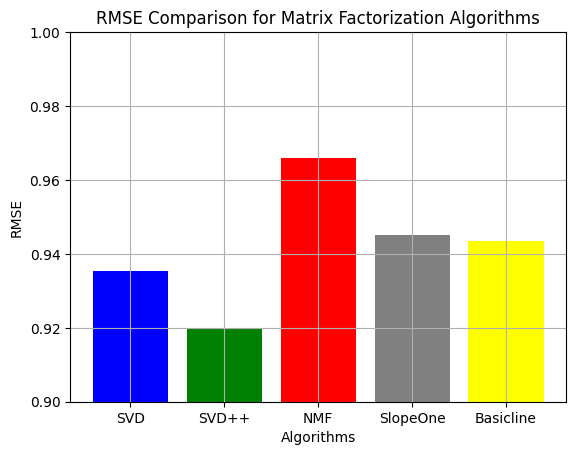

In [5]:
#Зробіти візуалізацію.
rmse_values = [svd_rmse, svdpp_rmse, nmf_rmse, slope_rmse, baseline_rmse]
algorithms = ['SVD', 'SVD++', 'NMF', 'SlopeOne', 'Basicline']
plt.bar(algorithms, rmse_values, color=['blue', 'green', 'red', 'grey', 'yellow'])
plt.xlabel('Algorithms')
plt.ylabel('RMSE')
plt.title('RMSE Comparison for Matrix Factorization Algorithms')
plt.ylim(0.9, 1.0)
plt.grid(True)
plt.show()

###### Висновок: Отже під час виконання завдання, я навчилася використовувати на практиці алгоритми SVD, SVD++, NMF, SlopeOne, Basicline для розробки рекомендаційної системи. Також навчилася визначати RMSE для кожного алгоритму на основі результатів крос-валідації. Вдосконалила знання з побудови та аналізу графіків. 